<a href="https://colab.research.google.com/github/Deepti2802/Machine-Learning-Projects/blob/main/Gold_Price_Prediction_using_ML_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Data Collection and Processing

In [ ]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#Last 5 rows 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
#Basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


 Correlation 
 1: Positive Correlation
 2:Negative Correlation
 

In [ ]:
correlation = gold_data.corr()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

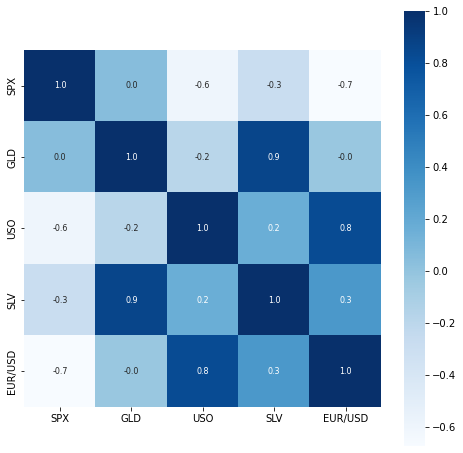

In [ ]:
# constructing a heatmap to understand the correlation 
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


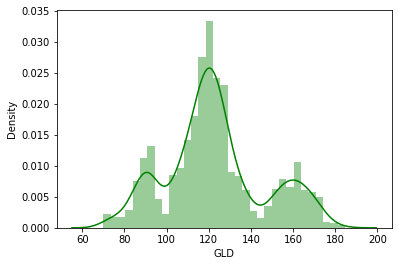

In [ ]:
#checking the distribution the gold price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [ ]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2, random_state=2)

Model Training: RandomForest Algorithm

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evalution

In [ ]:
#prediction on the test Data
test_data_prediction =  regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.68559911  82.03889994 116.09720015 127.506501   120.73140114
 154.60449753 149.90619872 126.05550039 117.47429863 125.95920096
 116.62390083 171.91560088 141.78409859 167.57209866 115.20169989
 117.53240061 138.48370318 170.31640081 159.70390265 155.78079956
 155.04060019 125.33490013 175.77030042 157.48490344 125.16760061
  94.13079969  77.22810012 120.81850037 119.12429954 167.51839934
  88.01510063 125.2211998   91.04910054 117.83469994 121.06799907
 136.10060077 115.5199011  114.68840069 147.6655994  107.47040125
 104.21510243  87.21499813 126.41440024 117.96930029 154.51999915
 119.69609982 108.35629967 108.05879814  93.21480068 127.08599798
  74.65260023 113.72239947 121.35700016 111.03009904 118.89709895
 120.95599947 159.32329994 168.13280105 147.09219679  85.98959856
  94.59520025  86.78429878  90.72980001 118.84090068 126.54050042
 127.56900006 170.37129958 122.3047991  117.49039847  98.62960054
 168.76320163 142.68249776 131.52400268 121.04190226 121.31739974
 119.83700

In [ ]:
#R squared  error
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squared error: ',error_score)

R squared error:  0.9888285925794712


Compare the Actual ; Values and Predicted Values in a Plot

In [ ]:
y_test = list(y_test)

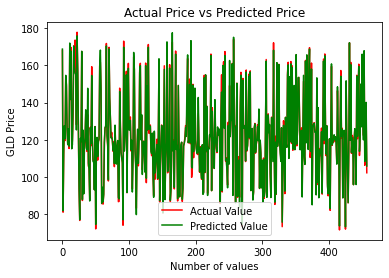

In [ ]:
plt.plot(y_test , color='red' , label = 'Actual Value')
plt.plot(test_data_prediction ,color ='green' ,label ='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()